In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

3-1非线性回归

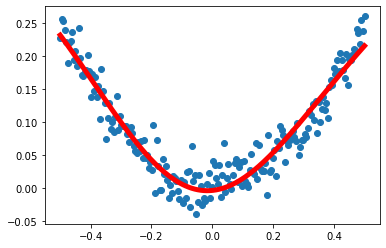

In [2]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]  #使其成为数组的数组，为后续神经网络数组操作
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))  #一个输入，10个神经元
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

3-2 MNIST数据集简单版本

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#载入数据集
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
#每个批次的大小
batch_size=50
#计算一共有多少批次
n_batch=mnist.train.num_examples // batch_size
 
#定义两个placeholder
x=tf.placeholder(tf.float32,[None,784]) #像素28*28=784
y=tf.placeholder(tf.float32,[None,10])  #10个标签：0-9
 
#创建一个简单的神经网络
W=tf.Variable(tf.zeros([784,10]))  #784个输入
b=tf.Variable(tf.zeros([1,10]))    #10个输出
prediction=tf.nn.softmax(tf.matmul(x,W)+b)
 
#二次代价函数
#1.方差：适用于线性激励函数
#loss=tf.reduce_mean(tf.square(y-prediction))
#2.交叉熵：适用于非线性激励函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
#使用剃度下降法
train_step=tf.train.GradientDescentOptimizer(0.2).minimize(loss)
 
#初始化变量
init=tf.global_variables_initializer()
 
#结果存放在一个布尔型列表中
correct_prediction=tf.equal(tf.argmax(y,1), tf.argmax(prediction,1)) #argmax返回一维张量中最大的值所在的位置
#求准确率
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))   #布尔转浮点，求平均值
 
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(500):
        for batch in range(n_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs, y:batch_ys})
 
        acc=sess.run(accuracy,feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("Iter"+str(epoch)+",Testing Accuracy "+str(acc))

Iter0,Testing Accuracy 0.8943
Iter1,Testing Accuracy 0.9054
Iter2,Testing Accuracy 0.9109
Iter3,Testing Accuracy 0.9125
Iter4,Testing Accuracy 0.9166
Iter5,Testing Accuracy 0.919
Iter6,Testing Accuracy 0.9176
Iter7,Testing Accuracy 0.9199
Iter8,Testing Accuracy 0.9212
Iter9,Testing Accuracy 0.9209
Iter10,Testing Accuracy 0.9223
Iter11,Testing Accuracy 0.923
Iter12,Testing Accuracy 0.923
Iter13,Testing Accuracy 0.9233
Iter14,Testing Accuracy 0.9235
Iter15,Testing Accuracy 0.9237
Iter16,Testing Accuracy 0.9246
Iter17,Testing Accuracy 0.924
Iter18,Testing Accuracy 0.9249
Iter19,Testing Accuracy 0.9259
Iter20,Testing Accuracy 0.9256
Iter21,Testing Accuracy 0.926
Iter22,Testing Accuracy 0.9262
Iter23,Testing Accuracy 0.9259
Iter24,Testing Accuracy 0.9268
Iter25,Testing Accuracy 0.9256
Iter26,Testing Accuracy 0.9261
Iter27,Testing Accuracy 0.9275
Iter28,Testing Accuracy 0.9277
Iter29,Testing Accuracy 0.927
Iter30,Testing Accuracy 0.9272
Iter31,Testing Accuracy 0.9284
Iter32,Testing Accuracy 

KeyboardInterrupt: 